# **Dropout et Normalisation par Lots (Batch Normalization)**  
Ajoutez ces couches spéciales pour éviter le surapprentissage et stabiliser l'entraînement.


## Introduction
Le monde de l'apprentissage profond ne se limite pas aux couches denses. Il existe des dizaines de types de couches que vous pourriez ajouter à un modèle. (Essayez de parcourir la documentation de Keras pour un aperçu !) Certaines sont similaires aux couches denses et définissent des connexions entre les neurones, tandis que d'autres peuvent effectuer du prétraitement ou des transformations de différents types.

Dans cette leçon, nous allons découvrir deux types de couches spéciales, qui ne contiennent pas de neurones elles-mêmes, mais qui ajoutent des fonctionnalités pouvant parfois bénéficier à un modèle de diverses manières. *Les deux sont couramment utilisées dans les architectures modernes*.

---

### **Dropout**  
La première de ces couches est la **couche de dropout**, qui peut aider à corriger le surapprentissage.

Dans la dernière leçon, nous avons expliqué que **le surapprentissage est causé par le réseau apprenant des motifs parasites dans les données d'entraînement**. Pour reconnaître ces motifs parasites, un réseau s'appuie souvent sur des combinaisons de poids très spécifiques, une sorte de "**conspiration" de poids**. Étant si spécifiques, ces combinaisons ont tendance à être fragiles : enlevez-en une et la conspiration s'effondre.

C'est l'idée derrière le dropout. Pour briser ces conspirations, nous désactivons aléatoirement une fraction des unités d'entrée d'une couche à chaque étape de l'entraînement, rendant ainsi beaucoup plus difficile pour le réseau d'apprendre ces motifs parasites dans les données d'entraînement. Au lieu de cela, il doit rechercher des motifs plus larges et généraux, dont les configurations de poids ont tendance à être plus robustes.

**Animation d'un réseau parcourant diverses configurations de dropout aléatoires.**  
Ici, un dropout de **50%** a été ajouté entre les deux couches cachées.

Vous pouvez également considérer le dropout comme la création d'une sorte d'ensemble de réseaux. Les prédictions ne seront plus faites par un seul grand réseau, mais plutôt par un comité de réseaux plus petits. Les individus dans le comité ont tendance à faire différents types d'erreurs, mais à être corrects en même temps, ce qui rend le comité dans son ensemble meilleur que tout individu. (Si vous connaissez les **forêts aléatoires comme un ensemble d'arbres de décision**, c'est la même idée.)



### Ajouter du Dropout 
Dans Keras, l'argument `rate` du dropout définit le pourcentage d'unités d'entrée à désactiver. Placez la couche `Dropout` juste avant la couche à laquelle vous souhaitez appliquer le dropout :

```
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # applique 30% de dropout à la couche suivante
    layers.Dense(16),
    # ...
])
```

---


## **Normalisation par Lots (Batch Normalization)**  
La prochaine couche spéciale que nous allons examiner effectue la **normalisation par lots** (ou "batchnorm"), qui peut aider à corriger un entraînement lent ou instable.

Avec les réseaux de neurones, il est généralement une bonne idée de mettre toutes vos données sur une échelle commune, peut-être avec quelque chose comme **StandardScaler** ou **MinMaxScaler** de scikit-learn. La raison est que la **descente de gradient stochastique (SGD)** ajustera les poids du réseau proportionnellement à la taille de l'activation produite par les données. Les caractéristiques qui ont tendance à produire des activations de tailles très différentes peuvent entraîner un comportement d'entraînement instable.

Maintenant, **s'il est bon de normaliser les données avant qu'elles n'entrent dans le réseau, peut-être que normaliser à l'intérieur du réseau serait encore mieux !** En effet, nous avons un type spécial de couche qui peut faire cela : la couche de normalisation par lots. Une **couche de normalisation par lots** examine chaque lot de données à mesure qu'il arrive, normalise d'abord le lot avec sa propre moyenne et son écart-type, puis remet les données à une nouvelle échelle avec deux paramètres de redimensionnement entraînables. En effet, la normalisation par lots effectue une sorte de redimensionnement coordonné de ses entrées.

Le plus souvent, la normalisation par lots est ajoutée comme une aide au processus d'optimisation (bien qu'elle puisse parfois aussi améliorer les performances de prédiction). Les modèles avec normalisation par lots ont tendance à nécessiter moins d'époques pour terminer l'entraînement. De plus, la normalisation par lots peut également résoudre divers problèmes qui peuvent faire que l'entraînement se "bloque". Envisagez d'ajouter la normalisation par lots à vos modèles, surtout si vous rencontrez des difficultés pendant l'entraînement.



### Ajouter la Normalisation par Lots  
Il semble que la normalisation par lots puisse être utilisée à presque n'importe quel point dans un réseau. Vous pouvez la placer après une couche...

```python
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),
```

... ou entre une couche et sa fonction d'activation :

```python
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),
```

Et si vous l'ajoutez comme première couche de votre réseau, elle peut agir comme une sorte de prétraitement adaptatif, remplaçant quelque chose comme `StandardScaler` de Sci-Kit Learn.

---

## **Exemple - Utilisation du Dropout et de la Normalisation par Lots**  
Continuons à développer le modèle de vin rouge. Maintenant, nous allons augmenter encore la capacité, mais ajouter :
- **dropout** pour contrôler le surapprentissage et
- **la normalisation par lots** pour accélérer l'optimisation.

Cette fois, nous laisserons également de côté la standardisation des données, pour démontrer comment la normalisation par lots peut stabiliser l'entraînement.


In [21]:
# Importation des bibliothèques pour l'affichage des graphiques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")     # Changer le style de la figure
plt.rc('figure', autolayout=True)  # Ajustement automatique des figures
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')  # Configuration des animations

red_wine = pd.read_csv('red-wine.csv')

# Créer des ensembles d'entraînement et de validation
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Séparer les caractéristiques et la cible
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']


- Lorsque vous **ajoutez du dropout**, vous devrez peut-être *augmenter le nombre d'unités* dans vos couches denses.

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=[11]),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

- Il n'y a rien à changer cette fois dans la configuration de l'entraînement.

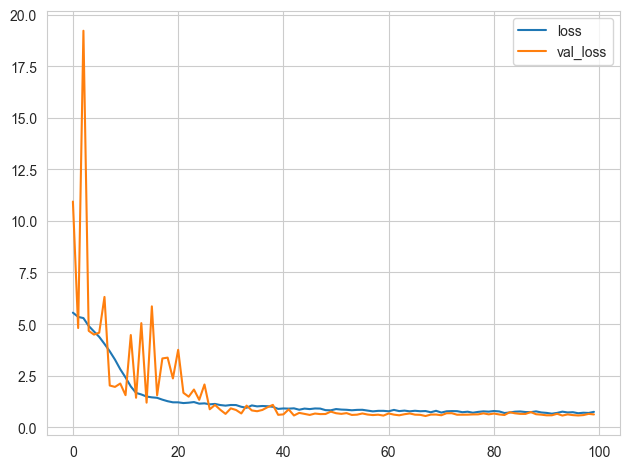

In [33]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)

# Afficher les courbes d'apprentissage
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

Vous obtiendrez généralement de meilleures performances si vous standardisez vos données avant de les utiliser pour l'entraînement. Cependant, le fait que nous ayons pu utiliser les données brutes montre à quel point la normalisation par lots peut être efficace sur des ensembles de données plus difficiles.

---

### **À vous de jouer**  
Passez à l'amélioration des prédictions sur l'ensemble de données Spotify avec le dropout et voyez comment la normalisation par lots peut aider avec des ensembles de données difficiles.

Vous avez des questions ou des commentaires ? Visitez le forum de discussion du cours pour discuter avec d'autres apprenants.

---
# **Exercice : Ajout de Dropout et Normalisation par Lots**  

Dans cet exercice, vous allez ajouter du **dropout** au modèle Spotify de l'exercice 4 et voir comment la **normalisation par lots** peut vous permettre d'entraîner avec succès des modèles sur des ensembles de données difficiles.

Exécutez la cellule suivante pour commencer !

In [44]:
# Importation des bibliothèques pour l'affichage des graphiques

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")     # Changer le style de la figure
plt.rc('figure', autolayout=True)  # Ajustement automatique des figures
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')  # Configuration des animations


In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

# Charger les données Spotify
spotify = pd.read_csv('spotify.csv')

# Préparer les données
X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

# Définir les caractéristiques numériques et catégorielles
features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

# Créer un prétraitement des données
preprocessor = make_column_transformer(
    (StandardScaler(), features_num),  # Standardisation des caractéristiques numériques
    (OneHotEncoder(), features_cat),  # Encodage one-hot des caractéristiques catégorielles
)

# Fonction pour diviser les données en ensembles d'entraînement et de validation
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

# Diviser les données
X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

# Appliquer le prétraitement
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

# Normaliser la cible (popularité) entre 0 et 1
y_train = y_train / 100
y_valid = y_valid / 100

# Définir la forme d'entrée du modèle
input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))


Input shape: [18]


---
### **Question 1 : Ajouter du Dropout au Modèle Spotify**  
Voici le dernier modèle de l'exercice 4. Ajoutez deux couches de **dropout** :  
- Une après la couche **Dense** avec 128 unités.  
- Une après la couche **Dense** avec 64 unités.  

Définissez le taux de dropout à **0.3** pour les deux couches.

In [53]:
# Ajoutez deux couches de dropout de 30%, une après 128 et une après 64
model = keras.Sequential([
    layers.Input(shape=[18]),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Dropout de 30% après la couche Dense de 128 unités
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),  # Dropout de 30% après la couche Dense de 64 unités
    layers.Dense(1)
])


Minimum Validation Loss: 0.1901


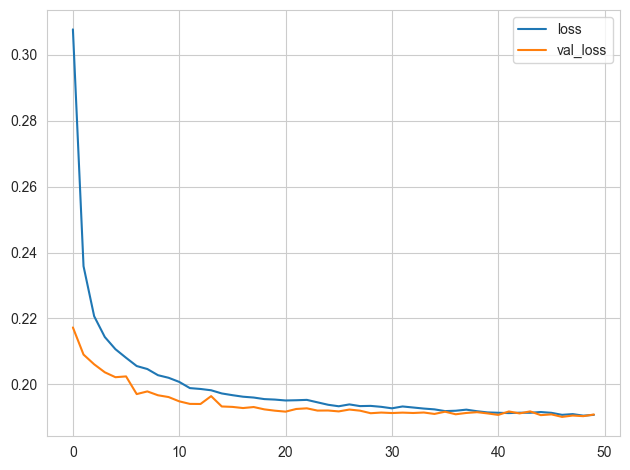

In [56]:
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0, # Supprime la sortie car nous allons tracer les courbes
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))


---
## **Question 2 : Évaluer l'Effet du Dropout**  
Rappelez-vous que dans l'exercice 4, ce modèle avait tendance à surajuster les données vers l'époque 5. L'ajout du dropout a-t-il semblé aider à prévenir le surapprentissage cette fois-ci ?

**Réponse correcte :**

D'après les courbes d'apprentissage, vous pouvez voir que la perte de validation reste proche d'un minimum constant, même si la perte d'entraînement continue de diminuer. Ainsi, nous pouvons constater que l'ajout du dropout a effectivement permis de prévenir le surapprentissage cette fois-ci. De plus, en rendant plus difficile l'ajustement des motifs parasites pour le réseau, le dropout a peut-être encouragé le réseau à rechercher davantage les vrais motifs, ce qui a également pu améliorer légèrement la perte de validation.

---
### **Maintenant, nous allons changer de sujet pour explorer comment la normalisation par lots (batch normalization) peut résoudre des problèmes lors de l'entraînement.**

Chargez l'ensemble de données **Concrete**. Cette fois, nous n'effectuerons aucune standardisation. Cela rendra l'effet de la normalisation par lots beaucoup plus apparent.

In [66]:
import pandas as pd

# Charger l'ensemble de données Concrete
concrete = pd.read_csv('concrete.csv')
df = concrete.copy()

# Diviser les données en ensembles d'entraînement et de validation
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

# Séparer les caractéristiques et la cible
X_train = df_train.drop('CompressiveStrength', axis=1)
X_valid = df_valid.drop('CompressiveStrength', axis=1)
y_train = df_train['CompressiveStrength']
y_valid = df_valid['CompressiveStrength']

# Définir la forme d'entrée du modèle
input_shape = [X_train.shape[1]]

### **Exécutez la cellule suivante pour entraîner le réseau sur les données Concrete non standardisées.**

Perte de validation minimale : nan


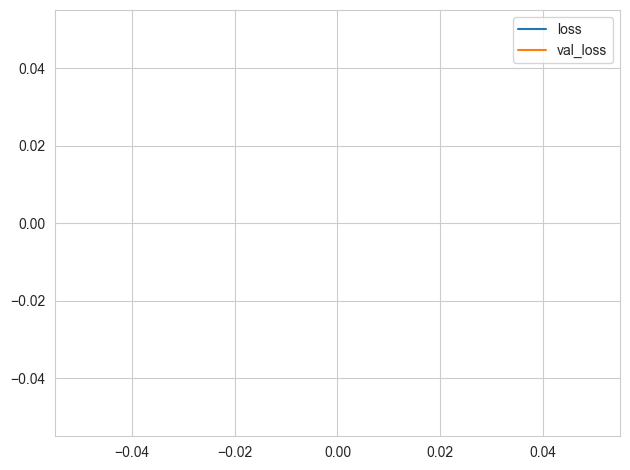

In [69]:
model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),    
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

# Compiler le modèle
model.compile(
    optimizer='sgd',  # SGD est plus sensible aux différences d'échelle
    loss='mae',
    metrics=['mae'],
)

# Entraîner le modèle
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=100,
    verbose=0,
)

# Afficher les courbes d'apprentissage
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Perte de validation minimale : {:0.4f}").format(history_df['val_loss'].min()))


**Avez-vous obtenu un graphique vide ?**  

Essayer d'entraîner ce réseau sur cet ensemble de données échoue généralement. Même lorsqu'il converge (grâce à une initialisation chanceuse des poids), il a tendance à converger vers une valeur très élevée.

### **Question 3 : Ajouter des Couches de Normalisation par Lots (Batch Normalization)**  
La normalisation par lots peut aider à résoudre des problèmes comme celui-ci.

Ajoutez **quatre couches de BatchNormalization**, une avant chaque couche dense. (N'oubliez pas de déplacer l'argument `input_shape` vers la nouvelle première couche.)

Minimum Validation Loss: 3.7831


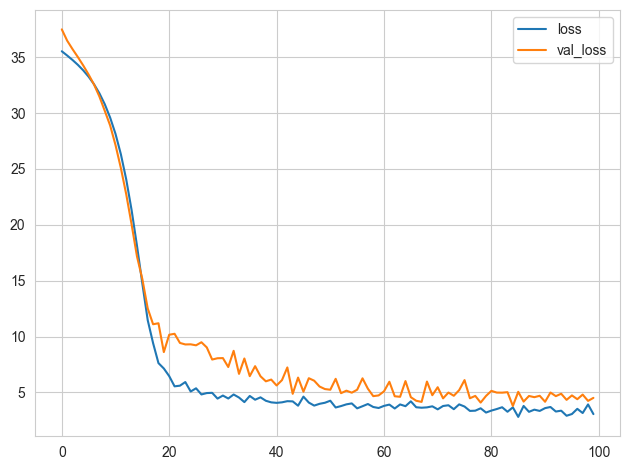

In [74]:
# Ajoutez une couche BatchNormalization avant chaque couche Dense
model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.BatchNormalization(),  # Normalisation par lots avant la première couche Dense
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),  # Normalisation par lots avant la deuxième couche Dense
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),  # Normalisation par lots avant la troisième couche Dense
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),  # Normalisation par lots avant la quatrième couche Dense
    layers.Dense(1),
])



model.compile(
    optimizer='sgd',
    loss='mae',
    metrics=['mae'],
)
EPOCHS = 100
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=EPOCHS,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

### **Question 4 : Évaluer l'Effet de la Normalisation par Lots**  
L'ajout de la normalisation par lots a-t-il aidé ?

**Réponse correcte :**

Vous pouvez constater que l'ajout de la normalisation par lots a été une grande amélioration par rapport à la première tentative ! En redimensionnant les données de manière adaptative à mesure qu'elles traversent le réseau, la normalisation par lots vous permet d'entraîner des modèles sur des ensembles de données difficiles.